In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
import seaborn as sb
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer

In [4]:
train = pd.read_csv('titanic/train.csv', dtype={'Survived': 'category', 'Pclass': 'category', 'Sex': 'category'})
test = pd.read_csv('titanic/test.csv', dtype={'Pclass': 'category', 'Sex': 'category'})

In [5]:
train.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [8]:
train['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [156]:
# Remove features that don't matter
train = train.drop(['PassengerId', 'Name'], axis=1)
# These might matter but we'd have to figure out how to extract numeric features from them
train = train.drop(['Ticket', 'Cabin'], axis=1)

In [157]:
# One-hot encode categorical variables
train = pd.get_dummies(train)

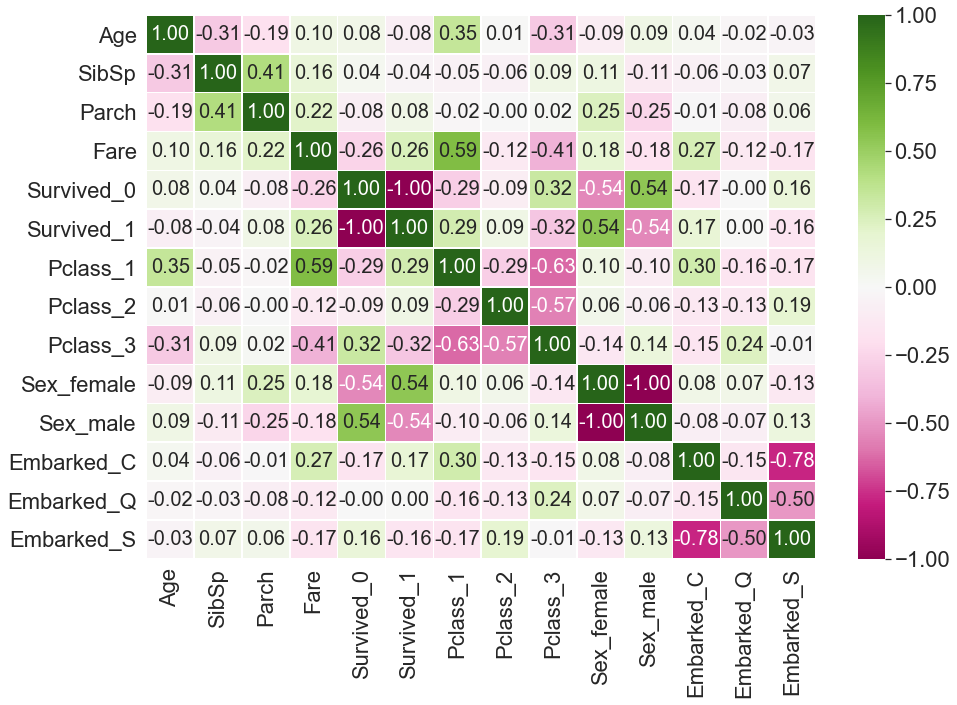

In [158]:
# Plot corr matrix
correlation_train = train.corr()
sb.set(font_scale=2)
plt.figure(figsize=(15, 10))
ax = sb.heatmap(correlation_train, annot=True, annot_kws={"size": 20}, fmt='.2f', cmap='PiYG', linewidths=.5)

In [159]:
# Find highly correlated features
for colno, col in enumerate(correlation_train.columns):
    for rowno, value in enumerate(correlation_train[col]):
        row = correlation_train.index[rowno]
        if np.abs(value) > 0.8 and rowno < colno:
            print(row, col, value)

Survived_0 Survived_1 -1.0
Sex_female Sex_male -1.0


In [160]:
train = train.drop(['Survived_0', 'Sex_female'], axis=1)

In [161]:
# Dealing with missing data, outliers, normalizing the data, etc.
display(train.isnull().sum())
display(100 * train.isnull().sum() / train.shape[0])

Age           177
SibSp           0
Parch           0
Fare            0
Survived_1      0
Pclass_1        0
Pclass_2        0
Pclass_3        0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

Age           19.86532
SibSp          0.00000
Parch          0.00000
Fare           0.00000
Survived_1     0.00000
Pclass_1       0.00000
Pclass_2       0.00000
Pclass_3       0.00000
Sex_male       0.00000
Embarked_C     0.00000
Embarked_Q     0.00000
Embarked_S     0.00000
dtype: float64

Skewness: 0.38910778230082704
Kurtosis: 0.17827415364210353


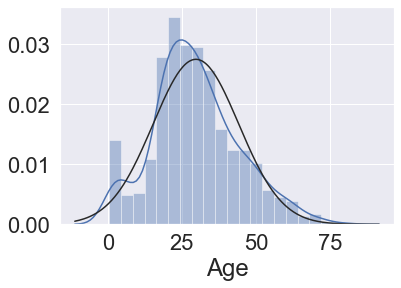

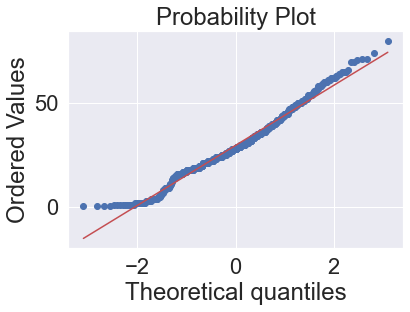

In [162]:
# There's some missing age data. Should we fill it with the median, the mean?
sb.distplot(train['Age'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['Age'].dropna(), plot=plt)

print("Skewness:", train['Age'].skew())
print("Kurtosis:", train['Age'].kurt())

Mean: 29.69911764705882
Skewness: 0.4344880940129925
Kurtosis: 0.9662793026645233


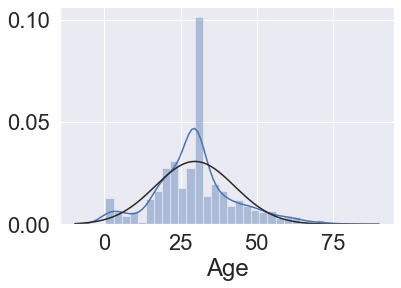

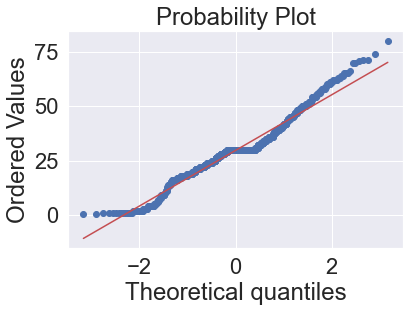

In [163]:
# Looks close enough to a normal distribution. We won't apply any transformations beforehand.
print("Mean:", train['Age'].mean())
# XXX: in the future, consider IterativeImputer
train['Age'] = SimpleImputer(strategy='mean').fit_transform(train['Age'].values.reshape(-1, 1))

sb.distplot(train['Age'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['Age'], plot=plt)

print("Skewness:", train['Age'].skew())
print("Kurtosis:", train['Age'].kurt())

Skewness: 3.1878768213280524
Kurtosis: 12.036302930814598


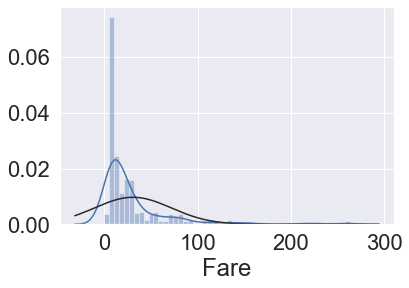

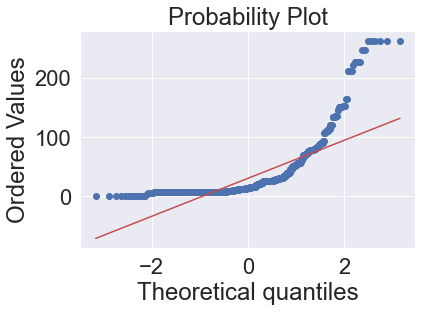

In [176]:
# Make sure Fare is normally distributed

sb.distplot(train['Fare'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['Fare'], plot=plt)

print("Skewness:", train['Fare'].skew())
print("Kurtosis:", train['Fare'].kurt())

In [171]:
# Remove outliers
train.sort_values('Fare', ascending=False)
train = train.drop(train[train['Fare'] > 500].index)

,Age,SibSp,Parch,Fare,Survived_1,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
27,19.000000,3,2,263.000,0,1,0,0,1,0,0,1
341,24.000000,3,2,263.000,1,1,0,0,0,0,0,1
438,64.000000,1,4,263.000,0,1,0,0,1,0,0,1
88,23.000000,3,2,263.000,1,1,0,0,0,0,0,1
742,21.000000,2,2,262.375,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
633,29.699118,0,0,0.000,0,1,0,0,1,0,0,1
413,29.699118,0,0,0.000,0,0,1,0,1,0,0,1
822,38.000000,0,0,0.000,0,1,0,0,1,0,0,1
732,29.699118,0,0,0.000,0,0,1,0,1,0,0,1


In [177]:
pt = PowerTransformer()
train['Fare_Pt'] = pt.fit_transform(train['Fare'].values.reshape(-1, 1))

Skewness: -0.029667052680456066
Kurtosis: 1.3535378520401768


,Age,SibSp,Parch,Survived_1,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Fare_Pt
0,22.000000,1,0,0,0,0,1,1,0,0,1,-0.882042
1,38.000000,1,0,1,1,0,0,0,1,0,0,1.371501
2,26.000000,0,0,1,0,0,1,0,0,0,1,-0.793208
3,35.000000,1,0,1,1,0,0,0,0,0,1,1.093274
4,35.000000,0,0,0,0,0,1,1,0,0,1,-0.777557
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0,0,0,0,1,0,1,0,0,1,-0.295524
887,19.000000,0,0,1,1,0,0,0,0,0,1,0.539713
888,29.699118,1,2,0,0,0,1,0,0,0,1,0.295983
889,26.000000,0,0,1,1,0,0,1,1,0,0,0.539713


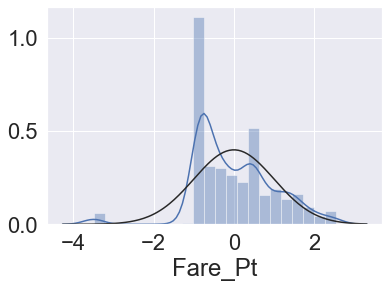

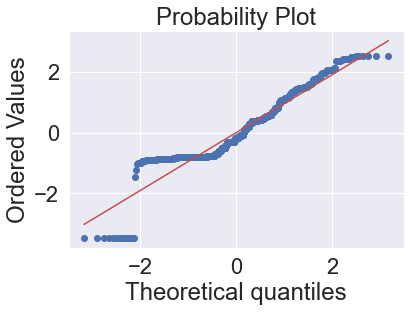

In [187]:
sb.distplot(train['Fare_Pt'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['Fare_Pt'], plot=plt)

print("Skewness:", train['Fare_Pt'].skew())
print("Kurtosis:", train['Fare_Pt'].kurt())

# Looks good enough
train = train.drop('Fare', axis=1)

In [195]:
# Scale numerical attributes before feeding them to machine learning algorithms

from sklearn.preprocessing import StandardScaler

num_attribs = ['Age', 'Fare_Pt', 'SibSp', 'Parch']
train[num_attribs] = StandardScaler().fit_transform(train[num_attribs])

In [199]:
from sklearn.metrics import accuracy_score, f1_score, precision_score

def display_metrics(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("F1:", f1_score(y_true, y_pred))

# Prepare to feed the data to machine learning algorithms
X_train, y_train = train.drop('Survived_1', axis=1), train['Survived_1']

In [200]:
# Decision tree classifier

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
display_metrics(y_train, y_pred)

Accuracy: 0.9819819819819819
Precision: 0.9938837920489296
F1: 0.9759759759759761


In [201]:
# SVM

from sklearn.svm import LinearSVC

model = LinearSVC(dual=False) # todo: use cross-validaation
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
display_metrics(y_train, y_pred)

Accuracy: 0.8018018018018018
Precision: 0.7620578778135049
F1: 0.7292307692307692


In [204]:
# Logistic regression

from sklearn.linear_model import LogisticRegressionCV

model = LogisticRegressionCV(cv=10, scoring='accuracy')
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
display_metrics(y_train, y_pred)

Accuracy: 0.8006756756756757
Precision: 0.7596153846153846
F1: 0.728110599078341


In [206]:
# Random forest classifier

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
display_metrics(y_train, y_pred)

Accuracy: 0.9819819819819819
Precision: 0.982089552238806
F1: 0.9762611275964391
